**# Recurrent Neural Network**

**# Part 1: Data Preprocessing**

**# Importing the libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**# Importing the training set**

In [0]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

**# Feature Scaling**

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


**# Creating a data structure with 60 timesteps and 1 output**

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


**# Reshaping**

In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

**# Part2 -- Building the RNN**

**# Importing the keras libraries and packages**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**# Initialising the RNN**

In [0]:
regressor = Sequential()

**# Adding the first LSTM layer and some Dropout Regularisation**

In [0]:
regressor.add(LSTM(units =50, return_sequences = True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

**#  Adding the second LSTM layer and some Dropout Regularisation**

In [0]:
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

**# Adding the third LSTM layer and some Dropout Regularisation**

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

**# Adding a fourth LSTM layer and some Dropout regularisation**

In [0]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

**# Adding the output layer**

In [0]:
regressor.add(Dense(units=1))

**# Compiling the RNN**

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**# Fitting the RNN to the Trainig set** 

In [32]:
regressor.fit(X_train , y_train , epochs=100 , batch_size = 32)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0080
Epoch 2/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0049
Epoch 3/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0035
Epoch 4/100
1/1 [==============================] - 0s 76ms/step - loss: 8.4727e-04
Epoch 5/100
1/1 [==============================] - 0s 83ms/step - loss: 8.0950e-04
Epoch 6/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0020
Epoch 7/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0023
Epoch 8/100
1/1 [==============================] - 0s 87ms/step - loss: 6.7729e-04
Epoch 9/100
1/1 [==============================] - 0s 80ms/step - loss: 2.8228e-06
Epoch 10/100
1/1 [==============================] - 0s 78ms/step - loss: 8.1680e-05
Epoch 11/100
1/1 [==============================] - 0s 79ms/step - loss: 2.5289e-05
Epoch 12/100
1/1 [==============================] - 0s 76ms/step - loss: 1.9878e-04
Epoch 13/100
1/1 [=====

**# Part 3 -Making the predictions and visualising the results.**

**# Getting the real stock price of 2017**

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[: , 1:2].values

**# Getting the predicted stock price in 2017**

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

**# visualising the results.**

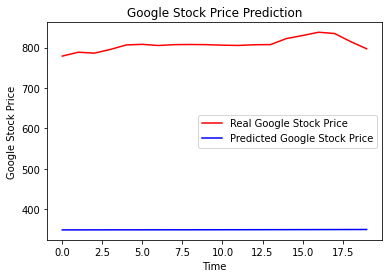

In [41]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()